# Examen

Integrantes:
- Diego Canales Morales
- Roi Jared Flores Graza Stone
- Mónica Ibarra Herrera
- Oscar Josué Rocha Hernández

In [211]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Parte 1

### Modelo Simple

In [212]:
path = "datos_gente.csv"
df_first = pd.read_csv(path)

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

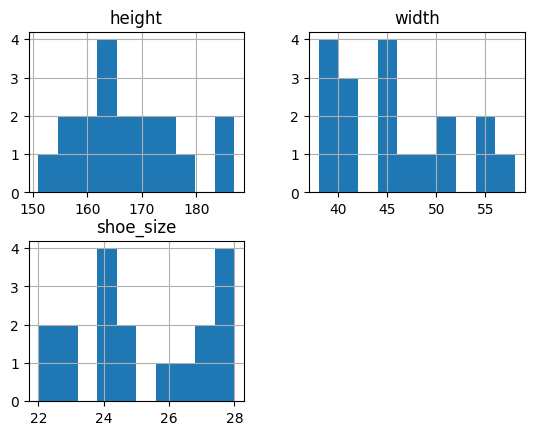

In [213]:
df_first.hist()

In [214]:
X = df_first[['width', 'shoe_size']]
y = df_first['height']

In [215]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X,y, test_size=0.2, random_state=99)

In [216]:
lr_first = LinearRegression()
lr_first.fit(x_test_f, y_test_f)
pred_first = lr_first.predict(x_test_f)
print(f"R2: {r2_score(y_test_f, pred_first)} RMSE: {root_mean_squared_error(y_test_f, pred_first)}")

R2: 0.8941176470588236 RMSE: 2.1213203435596424


In [217]:
print(f"Pendientes: {lr_first.coef_}")
print(f"Intercepto: {lr_first.intercept_}")

Pendientes: [1.625 3.75 ]
Intercepto: -12.375000000000057


In [218]:
# Predecir valores para el plano de regresión
x1_range = np.linspace(min(X['width']), max(X['width']), 20)
x2_range = np.linspace(min(X['shoe_size']), max(X['shoe_size']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_mesh = lr_first.predict(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T).reshape(x1_mesh.shape)

# Crear scatterplot 3D de los puntos
scatter = go.Scatter3d(
    x=X['width'], y=X['shoe_size'], z=y,
    mode='markers',
    marker=dict(size=8, color='red')
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh,
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
    title=f"REGRESION<br>R2: {r2_score(y_test_f, pred_first)} RMSE: {root_mean_squared_error(y_test_f, pred_first)}",
    scene=dict(
        xaxis_title='Variable X1',
        yaxis_title='Variable X2',
        zaxis_title='Variable Y'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()


c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



**¿Por qué seleccionaste ese modelo?**

Al tener pocos datos decidimos hacer una regresión simple ya que es un modelo fácil de interpretar y de aplicar. Modelos más complejos pueden sobreajustar los datos sobretodo con la poca cantidad de datos que hay.

**¿Utilizaste alguna regularización?**

No, se hizo una regresión lineal simple, sin regularización.

## Parte 2

### Modelo Iteso

In [219]:
path = "datos_gente_1.csv"

df_comb = pd.read_csv(path)

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

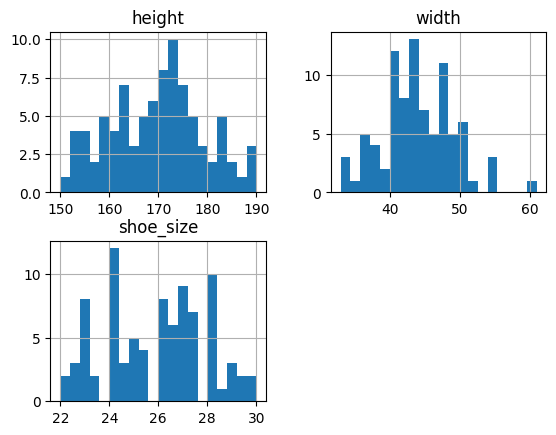

In [220]:
df_comb.hist(bins=20)

In [221]:
X = df_comb[["width", "shoe_size"]]
y = df_comb["height"]

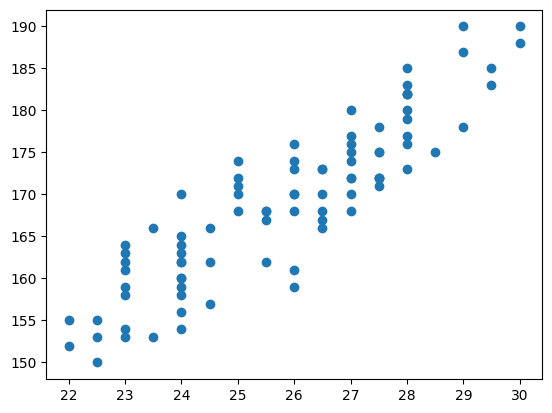

In [222]:
plt.scatter(df_comb["shoe_size"], df_comb["height"])

In [223]:
q25 = np.quantile(y, 0.25)
q75 = np.quantile(y, 0.75)

df_left = df_comb[df_comb["height"] <= q25]
df_right = df_comb[df_comb["height"] >= q75]
df_center = df_comb[(df_comb["height"] >= q25) & (df_comb["height"] <= q75)] 

In [224]:
def sintetizar_datos(df_a_combinar, df_new):
    X_left = df_new[["width", "shoe_size"]]
    y_left = df_new["height"]

    w_m = np.mean(df_new["width"])
    s_m = np.mean(df_new["shoe_size"])
    h_m = np.mean(df_new["height"])

    w_s = np.std(df_new["width"])
    s_s = np.std(df_new["shoe_size"])
    h_s = np.std(df_new["height"])

    new_data_w = np.random.normal(loc=w_m, scale=w_s, size=100)
    new_data_s = np.random.normal(loc=s_m, scale=s_s, size=100)
    new_data_h = np.random.normal(loc=h_m, scale=h_s, size=100)

    new_sorted_w = sorted(new_data_w)
    new_sorted_s = sorted(new_data_s)
    new_sorted_h = sorted(new_data_h)

    df_new_1 = pd.DataFrame({
        "width": new_sorted_w,
        "shoe_size": new_sorted_s,
        "height": new_sorted_h
    })

    df_new_1 = df_new_1.apply(lambda x: round(x, 0))

    df_a_combinar = pd.concat([df_a_combinar, df_new_1])
    return df_a_combinar

In [225]:
data_left = sintetizar_datos(df_comb, df_left)
data_right = sintetizar_datos(df_comb, df_right)

(array([[<Axes: title={'center': 'height'}>,
         <Axes: title={'center': 'width'}>],
        [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'height'}>,
         <Axes: title={'center': 'width'}>],
        [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object))

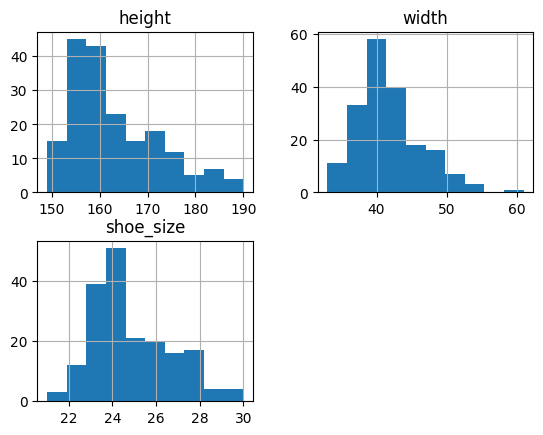

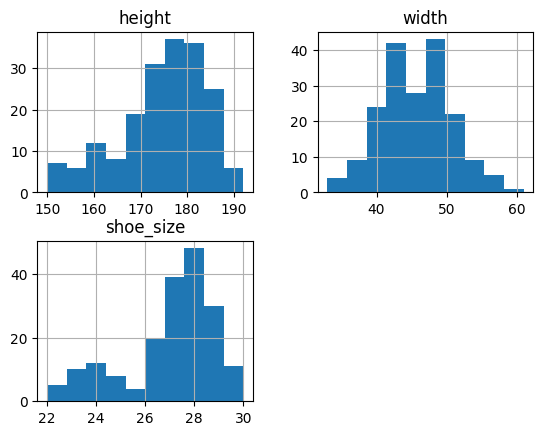

In [226]:
data_left.hist(), data_right.hist()

In [227]:
x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(data_left.drop("height", axis=1), data_left["height"], test_size= 0.2, random_state=55)
x_train_right, x_test_right, y_train_right, y_test_right = train_test_split(data_right.drop("height", axis=1), data_right["height"], test_size= 0.2, random_state=55)
x_train_center, x_test_center, y_train_center, y_test_center = train_test_split(df_comb.drop("height", axis=1), df_comb["height"], test_size= 0.2, random_state=55)

In [228]:
ss_left = StandardScaler()
ss_right = StandardScaler()
ss_center = StandardScaler()


X_train_s_left = ss_left.fit_transform(x_train_left)
X_test_s_left = ss_left.transform(x_test_left)

X_train_s_right = ss_right.fit_transform(x_train_right)
X_test_s_right = ss_right.transform(x_test_right)

X_train_s_center = ss_center.fit_transform(x_train_center)
X_test_s_center = ss_center.transform(x_test_center)

### Right model

Aqui se crea el modelo que predice de manera más adecuada los valores de la derecha

In [229]:
rg_r = Ridge(alpha = 1.26)
rg_r.fit(X_train_s_right, y_train_right)
r_pred_right = rg_r.predict(X_test_s_right)
print(f"R2: {r2_score(y_test_right, r_pred_right)} RMSE: {root_mean_squared_error(y_test_right, r_pred_right)}")

R2: 0.8579685828534016 RMSE: 3.173212873716381


In [230]:
print(f"Pendientes: {rg_r.coef_}")
print(f"Intercepto: {rg_r.intercept_}")

Pendientes: [1.66389592 7.35357628]
Intercepto: 174.35570469798657


In [231]:
values_para_right = ss_right.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [232]:
rg_r.predict(values_para_right)

array([154.59244685])

In [233]:
# Definir rangos para las variables independientes
x1_range = np.linspace(min(x_train_right['width']), max(x_train_right['width']), 20)
x2_range = np.linspace(min(x_train_right['shoe_size']), max(x_train_right['shoe_size']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Escalar el meshgrid para predicción
x_mesh_scaled = ss_right.transform(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T)

# Predecir los valores con el modelo escalado
y_mesh_scaled = rg_r.predict(x_mesh_scaled)

# Crear scatterplot 3D de los puntos reales
scatter = go.Scatter3d(
    x=x_test_right['width'], y=x_test_right['shoe_size'], z=y_test_right,
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.7)
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh_scaled.reshape(x1_mesh.shape),
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
    title=f"ITESO RIGHT<br>R2: {r2_score(y_test_right, r_pred_right)} RMSE: {root_mean_squared_error(y_test_right, r_pred_right)}",
    scene=dict(
        xaxis_title='Ancho',
        yaxis_title='Pie',
        zaxis_title='Altura'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



## Left model

Modelo que predice mejor los valores del lado izquierdo

In [234]:
rg_l = Ridge(alpha = 1.26)
rg_l.fit(X_train_s_left, y_train_left)
r_pred_left = rg_l.predict(X_test_s_left)
print(f"R2: {r2_score(y_test_left, r_pred_left)} RMSE: {root_mean_squared_error(y_test_left, r_pred_left)}")

R2: 0.7745275608222341 RMSE: 3.5764335018121596


In [235]:
print(f"Pendientes: {rg_l.coef_}")
print(f"Intercepto: {rg_l.intercept_}")

Pendientes: [1.78473504 7.05360501]
Intercepto: 163.2281879194631


In [236]:
values_para_left = ss_left.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [237]:
rg_l.predict(values_para_left)

array([153.11764719])

In [238]:
# Definir rangos para las variables independientes
x1_range = np.linspace(min(x_train_left['width']), max(x_train_left['width']), 20)
x2_range = np.linspace(min(x_train_left['shoe_size']), max(x_train_left['shoe_size']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Escalar el meshgrid para predicción
x_mesh_scaled = ss_left.transform(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T)

# Predecir los valores con el modelo escalado
y_mesh_scaled = rg_l.predict(x_mesh_scaled)

# Crear scatterplot 3D de los puntos reales
scatter = go.Scatter3d(
    x=x_test_left['width'], y=x_test_left['shoe_size'], z=y_test_left,
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.7)
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh_scaled.reshape(x1_mesh.shape),
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
    title=f"ITESO LEFT<br>R2: {r2_score(y_test_left, r_pred_left)} RMSE: {root_mean_squared_error(y_test_left, r_pred_left)}",
    scene=dict(
        xaxis_title='Ancho',
        yaxis_title='Pie',
        zaxis_title='Altura'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### Center model

In [239]:
rg_c = Ridge(alpha = 1.26)
rg_c.fit(X_train_s_center, y_train_center)
r_pred_center = rg_c.predict(X_test_s_center)
print(f"R2: {r2_score(y_test_center, r_pred_center)} RMSE: {root_mean_squared_error(y_test_center, r_pred_center)}")

R2: 0.8484303924224865 RMSE: 4.280983988385949


In [240]:
print(f"Pendientes: {rg_c.coef_}")
print(f"Intercepto: {rg_c.intercept_}")

Pendientes: [0.84705044 7.40777022]
Intercepto: 169.1014492753623


In [241]:
values_para_center = ss_center.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [242]:
rg_c.predict(values_para_center)

array([155.08588937])

In [243]:
# Definir rangos para las variables independientes
x1_range = np.linspace(min(x_train_center['width']), max(x_train_center['width']), 20)
x2_range = np.linspace(min(x_train_center['shoe_size']), max(x_train_center['shoe_size']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Escalar el meshgrid para predicción
x_mesh_scaled = ss_center.transform(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T)

# Predecir los valores con el modelo escalado
y_mesh_scaled = rg_c.predict(x_mesh_scaled)

# Crear scatterplot 3D de los puntos reales
scatter = go.Scatter3d(
    x=x_test_center['width'], y=x_test_center['shoe_size'], z=y_test_center,
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.7)
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh_scaled.reshape(x1_mesh.shape),
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
    title=f"ITESO CENTER<br>R2: {r2_score(y_test_center, r_pred_center)} RMSE: {root_mean_squared_error(y_test_center, r_pred_center)}",
    scene=dict(
        xaxis_title='Ancho',
        yaxis_title='Pie',
        zaxis_title='Altura'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



**¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?**

Sí, al tener tan pocos datos, en específico 18 necesitamos más datos ya que las predicciones que se hagan con el modelo no van a ser tan confiables, ya que son más sensibles a datos atípicos.

**¿Cómo conseguirías dicha información?**

Medimos a 70 personas más y como se muestra anteriormente se segmentaron los datos de la altura, se hicieron nuevos datos para los datos cuya altura fueran menor o igual al primer cuartil, para los que fueran mayor o igual al tercer cuartil y para los que estuvieran entre el primer y tercer cuartil, en específico se hicieron 100 para cada uno.

**¿Modificarías algún parámetro de tu modelo?**

En este caso, al segmentar los datos por alturas, se hicieron 3 modelos. A los 3 modelos se le aplicó regularización Ridge con un alpha de 1.26, el cual se obtuvo mediante diferentes pruebas e intentos para obtener el valor óptimo.

## Parte 3

### Países Bajos

In [244]:
df = pd.read_csv('datos_gente_1.csv')

In [245]:
df2 = df[df['height'] > 176.5]
df2

,height,width,shoe_size
0,185,55,28.0
6,187,48,29.0
12,179,55,28.0
22,177,42,27.0
25,180,45,27.0
33,178,49,27.5
41,190,50,29.0
44,180,50,28.0
47,178,45,29.0
51,182,47,28.0


array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

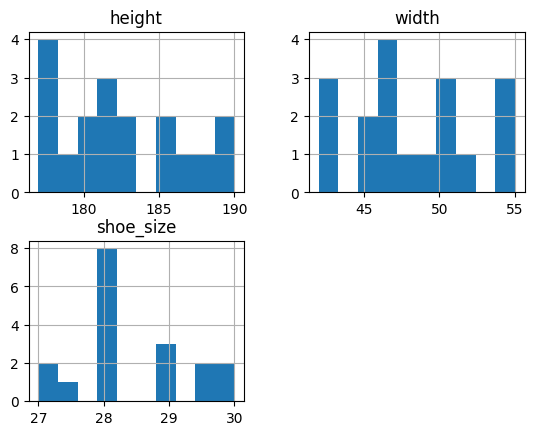

In [246]:
df2.hist()

In [247]:
df2.mean()

height       182.555556
width         48.222222
shoe_size     28.416667
dtype: float64

In [248]:
df2.std()

height       4.217920
width        4.180565
shoe_size    0.927520
dtype: float64

In [249]:
df2_nuevo_altura = np.random.normal(loc=182.56, scale=4.22, size=100)
df_altura_red= np.round(df2_nuevo_altura, 0)
df_altura = np.sort(df_altura_red)
df_altura

array([168., 175., 175., 177., 177., 177., 177., 177., 177., 177., 178.,
       178., 178., 178., 179., 179., 179., 179., 179., 179., 179., 179.,
       179., 180., 180., 180., 180., 180., 180., 180., 181., 181., 181.,
       181., 181., 181., 182., 182., 182., 182., 182., 182., 182., 182.,
       182., 182., 183., 183., 183., 183., 183., 183., 184., 184., 184.,
       184., 184., 184., 184., 184., 184., 184., 185., 185., 185., 185.,
       185., 185., 185., 185., 186., 186., 186., 186., 186., 186., 186.,
       186., 186., 187., 187., 187., 187., 187., 187., 187., 188., 188.,
       188., 188., 188., 188., 188., 189., 189., 189., 189., 191., 191.,
       193.])

In [250]:
df2_nuevo_ancho = np.random.normal(loc=48.22, scale=4.18, size=100)
df_ancho_red= np.round(df2_nuevo_ancho, 0)
df_ancho = np.sort(df_ancho_red)
df_ancho

array([37., 39., 40., 40., 41., 42., 42., 42., 42., 42., 43., 44., 44.,
       44., 44., 44., 44., 44., 45., 45., 45., 45., 46., 46., 47., 47.,
       47., 47., 47., 47., 47., 47., 47., 47., 47., 48., 48., 48., 48.,
       48., 48., 48., 48., 48., 48., 48., 48., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 52.,
       52., 52., 52., 52., 52., 52., 52., 52., 53., 53., 53., 53., 54.,
       54., 54., 55., 56., 56., 57., 57., 58., 61.])

In [251]:
df2_nuevo_pie = np.random.normal(loc=28.42, scale=0.93, size=100)
df_pie_red= np.round(df2_nuevo_pie, 1)
df_pie= np.sort(df_pie_red)
df_pie

array([26.8, 26.9, 26.9, 27. , 27.1, 27.1, 27.1, 27.2, 27.2, 27.2, 27.2,
       27.3, 27.3, 27.3, 27.3, 27.3, 27.4, 27.4, 27.4, 27.4, 27.6, 27.6,
       27.7, 27.7, 27.7, 27.7, 27.7, 27.9, 27.9, 27.9, 27.9, 27.9, 28. ,
       28. , 28.1, 28.1, 28.1, 28.2, 28.2, 28.2, 28.2, 28.3, 28.3, 28.3,
       28.3, 28.3, 28.3, 28.4, 28.4, 28.4, 28.5, 28.5, 28.5, 28.5, 28.6,
       28.6, 28.6, 28.6, 28.6, 28.7, 28.8, 28.8, 28.8, 28.9, 28.9, 28.9,
       28.9, 28.9, 28.9, 29. , 29. , 29. , 29. , 29. , 29.1, 29.1, 29.1,
       29.1, 29.1, 29.2, 29.2, 29.3, 29.3, 29.3, 29.4, 29.4, 29.5, 29.5,
       29.5, 29.6, 29.7, 29.7, 29.8, 29.9, 30. , 30.1, 30.1, 30.2, 30.2,
       31. ])

In [252]:
df_pb = pd.DataFrame({'height': df_altura, 'width': df_ancho, 'shoe_size': df_pie})
df_pb

,height,width,shoe_size
0,168.0,37.0,26.8
1,175.0,39.0,26.9
2,175.0,40.0,26.9
3,177.0,40.0,27.0
4,177.0,41.0,27.1
...,...,...,...
95,189.0,56.0,30.1
96,189.0,57.0,30.1
97,191.0,57.0,30.2
98,191.0,58.0,30.2


array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

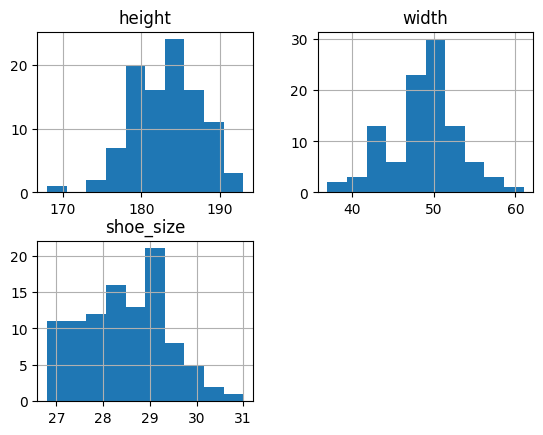

In [253]:
df_pb.hist()

In [254]:
X = df_pb.drop("height", axis=1)
y = df_pb["height"]

In [255]:
x_train_pb, x_test_pb, y_train_pb, y_test_pb = train_test_split(X, y, test_size=0.20, random_state=48)

In [256]:
ss_pb = StandardScaler()
x_train_pb_ss = ss_pb.fit_transform(x_train_pb)
x_test_pb_ss = ss_pb.transform(x_test_pb)

In [257]:
modelo_pb = LinearRegression()
modelo_pb.fit(x_train_pb_ss, y_train_pb)
pb_pred = modelo_pb.predict(x_test_pb_ss)
r2 = r2_score(y_test_pb, pb_pred)
print(f"R2:{r2_score(y_test_pb, pb_pred)}, RMSE: {root_mean_squared_error(y_test_pb, pb_pred)}")

R2:0.9739044815420799, RMSE: 0.6347557049686814


In [258]:
print(f"Pendientes: {modelo_pb.coef_}")
print(f"Intercepto: {modelo_pb.intercept_}")

Pendientes: [2.68090605 1.46161266]
Intercepto: 182.825


In [259]:
values_pb= ss_pb.transform([[44,27.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [260]:
modelo_pb.predict(values_pb)

array([178.46157391])

In [261]:
x_train_pb = np.array(x_train_pb)
x_test_pb = np.array(x_test_pb)

In [262]:
# Definir rangos para las variables independientes
x1_range = np.linspace(min(x_train_pb[:, 0]), max(x_train_pb[:, 0]), 20)
x2_range = np.linspace(min(x_train_pb[:, 1]), max(x_train_pb[:, 1]), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Escalar el meshgrid para predicción
x_mesh_scaled = ss_pb.transform(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T)

# Predecir los valores con el modelo escalado
y_mesh_scaled = modelo_pb.predict(x_mesh_scaled)

# Crear scatterplot 3D de los puntos reales
scatter = go.Scatter3d(
    x=x_test_pb[:, 0], y=x_test_pb[:, 1], z=y_test_pb,
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.7)
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh_scaled.reshape(x1_mesh.shape),
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
    title=f"REGRESION<br>R2: {r2_score(y_test_pb, pb_pred)} RMSE: {root_mean_squared_error(y_test_pb, pb_pred)}",
    scene=dict(
        xaxis_title='Ancho',
        yaxis_title='Pie',
        zaxis_title='Altura'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()


c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



**¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?**

Sí, ya que la altura promedio de un mexicano no es la misma que la altura de una persona de Países Bajos.

**¿Cómo conseguirías dicha información?**

Al tener que el promedio de altura de un hombre de Países Bajos es de 183 cm y la altura promedio de una mujer de Países Bajos es de 170 cm, promediamos las alturas y nos basamos en los datos originales y en los que recabamos de las 70 personas que medimos para crear nuevos datos.

**¿Modificarías algún parámetro de tu modelo?**

En este caso, al no tener ningún dato de personas de países bajos y después de hacer gridsearch para obtener el modelo con las mejores métricas, llegamos a la conclusión de que una regresión lineal simple era el mejor modelo, por lo que no aplicamos ninguna regularización.

## Parte 4

### Ambos contextos

In [263]:
df_combined = pd.concat([df_center, data_left, data_right, df_pb])

In [264]:
# Dividir los datos en entrenamiento y prueba
X_c = df_combined.drop("height", axis=1)
y_c = df_combined["height"]

In [265]:
x_train, x_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)  

In [266]:
ridge_params = {'alpha': np.logspace(0, 10, 20)}
lasso_params = {'alpha': np.logspace(0, 6, 10)}
enet_params = {'alpha': np.logspace(0, 6, 20), 'l1_ratio': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]}


ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()


ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
enet_grid = GridSearchCV(enet, enet_params, scoring='neg_mean_squared_error', cv=5)

ridge_grid.fit(X, y)
lasso_grid.fit(X, y)
enet_grid.fit(X, y)


print("Ridge Regression:")
print(f"Best parameters: {ridge_grid.best_params_}")
print(f"RMSE: {np.sqrt(-ridge_grid.best_score_):.2f}")

print("\nLasso Regression:")
print(f"Best parameters: {lasso_grid.best_params_}")
print(f"RMSE: {np.sqrt(-lasso_grid.best_score_):.2f}")

print("\nElastic Net Regression:")
print(f"Best parameters: {enet_grid.best_params_}")
print(f"RMSE: {np.sqrt(-enet_grid.best_score_):.2f}")

Ridge Regression:
Best parameters: {'alpha': 11.28837891684689}
RMSE: 0.91

Lasso Regression:
Best parameters: {'alpha': 1.0}
RMSE: 0.99

Elastic Net Regression:
Best parameters: {'alpha': 1.0, 'l1_ratio': 0.1}
RMSE: 0.96


In [267]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

In [268]:
param_grid = {'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5, 3]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_ss, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5, 3]}, scoring='r2')

In [269]:
modelo_combinado = grid_search.best_estimator_
print(f"Mejor alpha: {grid_search.best_params_['alpha']}")

Mejor alpha: 0.1


In [270]:
predicciones = modelo_combinado.predict(x_test_ss)
r2 = r2_score(y_test, predicciones)
rmse = np.sqrt(np.mean((y_test - predicciones)**2))

In [271]:
print(f"R2: {r2}, RMSE: {rmse}")

R2: 0.8939312666725858, RMSE: 3.4732456779027863


In [272]:
print(f"Pendientes: {modelo_combinado.coef_}")
print(f"Intercepto: {modelo_combinado.intercept_}")

Pendientes: [0.76069527 9.84702276]
Intercepto: 171.82692307692307


In [273]:
values = ss.transform([[39,24.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [274]:
modelo_combinado.predict(values)

array([162.61828879])

In [275]:
# Definir rangos para las variables independientes
x1_range = np.linspace(min(x_train['width']), max(x_train['width']), 20)
x2_range = np.linspace(min(x_train['shoe_size']), max(x_train['shoe_size']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Escalar el meshgrid para predicción
x_mesh_scaled = ss.transform(np.vstack((x1_mesh.ravel(), x2_mesh.ravel())).T)

# Predecir los valores con el modelo escalado
y_mesh_scaled = modelo_combinado.predict(x_mesh_scaled)

# Crear scatterplot 3D de los puntos reales
scatter = go.Scatter3d(
    x=x_test['width'], y=x_test['shoe_size'], z=y_test,
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.7)
)

# Crear el plano de regresión
surface = go.Surface(
    x=x1_mesh, y=x2_mesh, z=y_mesh_scaled.reshape(x1_mesh.shape),
    colorscale='Viridis', opacity=0.5
)

# Configuración del layout
layout = go.Layout(
     title=f"MODELO COMBINADO<br>R2: {r2_score(y_test, predicciones)} RMSE: {root_mean_squared_error(y_test, predicciones)}",
    scene=dict(
        xaxis_title='Ancho',
        yaxis_title='Pie',
        zaxis_title='Altura'
    )
)

# Crear la figura
fig = go.Figure(data=[scatter, surface], layout=layout)

# Mostrar la figura interactiva
fig.show()

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

